<a href="https://colab.research.google.com/github/erlynnur/STRUKTUR-DATA-SEMESTER-2/blob/main/Tugas_DJIKSTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib

Jarak dari A ke Z: inf
Jalur: Z


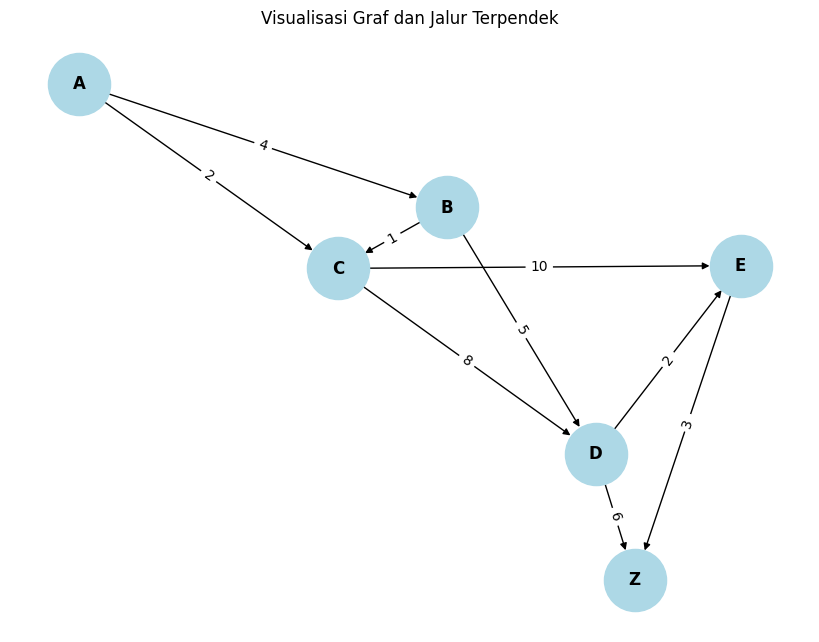

Jarak dari A ke Z (dengan siklus): inf
Jalur: Z


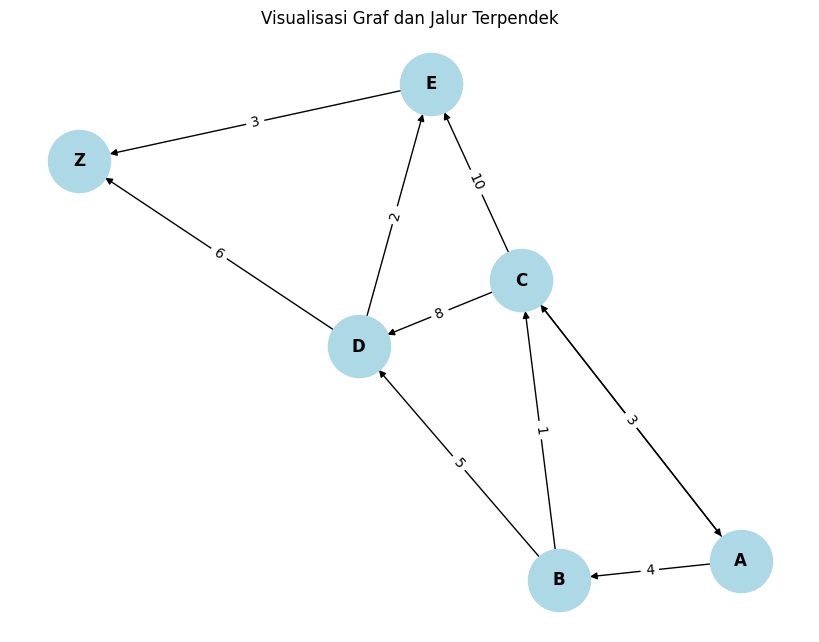

Jarak dari A ke Z (dengan simpul baru): inf
Jalur: Z


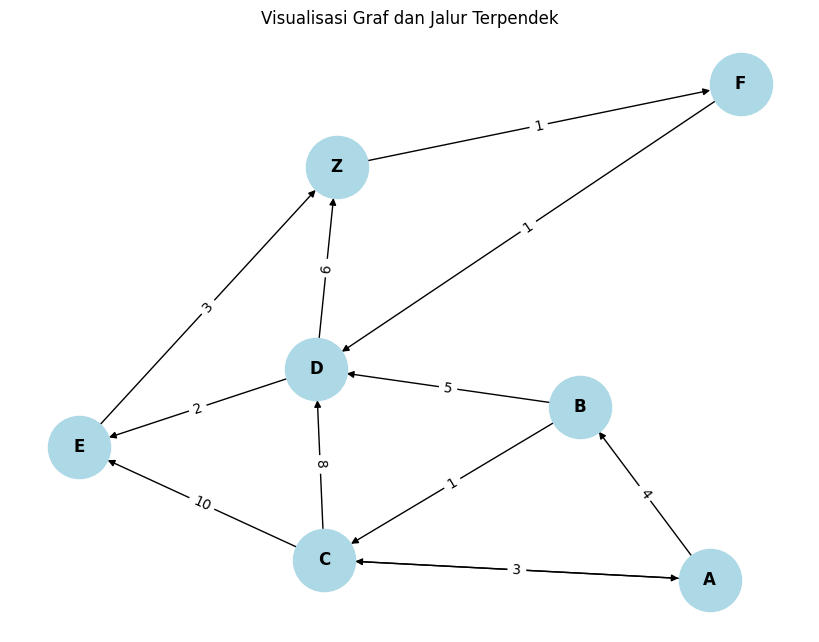

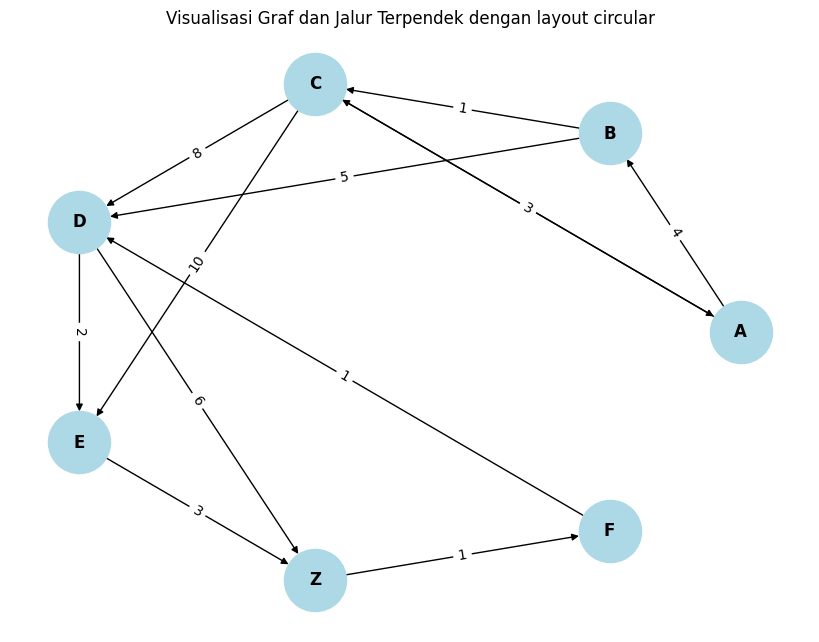

In [ ]:
#nomor 2(latihan)
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
  distances = {node: float('inf') for node in graph}
  distances[start] = 0
  previous = {node: None for node in graph}
  queue = [(0, start)]
  while queue:
    current_distance, current_node = heapq.heappop(queue)

    for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous
#NOmor 3(latihan)
def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

#nomor 4(latihan)
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Visualisasi Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

    #nomor 5(latihan)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

start_node = 'A'
end_node = 'Z'

distances, previous = dijkstra_with_paths(graph, start_node)
shortest_path = get_path(previous, end_node)

print(f"Jarak dari {start_node} ke {end_node}: {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

visualize_graph(graph, path=shortest_path)

#Tugas no 1
graph_with_cycle = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10, 'A': 3},  # Edge balik ke A bikin siklus
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {}
}

distances, previous = dijkstra_with_paths(graph_with_cycle, 'A')
shortest_path = get_path(previous, 'Z')

print(f"Jarak dari A ke Z (dengan siklus): {distances['Z']}")
print(f"Jalur: {' → '.join(shortest_path)}")

visualize_graph(graph_with_cycle, path=shortest_path)

#nomor 2(tugas)
graph_with_new_node = {
    'A': {'B': 4, 'C': 2},
    'B': {'C': 1, 'D': 5},
    'C': {'D': 8, 'E': 10, 'A': 3},
    'D': {'E': 2, 'Z': 6},
    'E': {'Z': 3},
    'Z': {'F': 1},  # Simpul baru F
    'F': {'D': 1}   # Edge dari F ke D, bikin siklus juga
}

distances, previous = dijkstra_with_paths(graph_with_new_node, 'A')
shortest_path = get_path(previous, 'Z')

print(f"Jarak dari A ke Z (dengan simpul baru): {distances['Z']}")
print(f"Jalur: {' → '.join(shortest_path)}")

visualize_graph(graph_with_new_node, path=shortest_path)

#nomor 3(tugas)
def visualize_graph_with_layout(graph, path=None, layout='spring'):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    if layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title(f"Visualisasi Graf dan Jalur Terpendek dengan layout {layout}")
    plt.axis('off')
    plt.show()

# circular layout
distances, previous = dijkstra_with_paths(graph_with_new_node, 'A')
shortest_path = get_path(previous, 'Z')

visualize_graph_with_layout(graph_with_new_node, path=shortest_path, layout='circular')